In [1]:
import numpy as np
from astropy.modeling.models import BlackBody1D
from astropy.modeling.blackbody import FLAM
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pierel_util as pierel

def fluxFromBB(temp,const,wave,absorptions=[],norm=True):
    bb=BlackBody1D(temperature=temp*u.K)
    bbFlux=[x.value for x in bb(wave*u.nm).to(FLAM,u.spectral_density(wave*u.nm))]
    bbFlux=np.array([x*const for x in bbFlux])
    bbFlux/=np.max(bbFlux)
    bbFlux+=.1
    if len(absorptions)>0:
        func=interp1d(wave,bbFlux)
        for ab in absorptions:
            wave=np.append(wave,[ab])
            bbFlux=np.append(bbFlux,[max(0,func(ab)-np.random.uniform(.15,.25))])
        inds=np.argsort(wave)
        wave=wave[inds]
        bbFlux=bbFlux[inds]
    return(wave,bbFlux)



In [2]:
def combine(*args):
    final=[]
    for l in args:
        final=np.append(final,l)
    return(final)

# helium=[447.148,501.567,587.562]
# hydrogen=[656.3,486.1,434.0,410.2,397.0]
# carbon=[687.0526,687.346]
# oxygen=[429.918,430.041,430.177,537.8319,538.2636,538.318,
#         539.0855,539.5489,539.8544,718.5036,718.5663]
# nitrogen=[64.5,91.6,120,174.5]
# calcium=[164.9858,165.1991,184.0061]
helium=[30.37804,30.37858,53.702992,58.433436,388.86456,388.86489,447.1479,587.56148]
hydrogen=[656.28518,486.12786,121.566824,121.567364,102.57222]
carbon=[68.70526,68.7346,90.41416,127.72824,127.75497,165.7008,193.0906,283.671,426.7258,723.642]
oxygen=[43.0041,43.0177,53.78319,53.82636,53.8318,53.90855,53.95489,53.98544,71.85036,71.85663,130.2168,130.4858]
nitrogen=[64.4837,64.5179,119.955,120.0223]
calcium=[317.9332,373.6901,393.36614,396.84673,422.6727]
wave=np.arange(100,25000,50)/10
categories=[[2000,3500],[3500,5000],[5000,6000],
            [6000,7500],[7500,11000],[11000,25000],[25000,50000]]
ab_cats=[oxygen,combine(carbon,nitrogen),calcium,combine(calcium,oxygen,carbon),
         hydrogen,helium,helium]
cat_names=['M','K','G','F','A','B','O']
cat_lims=[(0,2500),(0,2500),(0,2500),(0,2000),(0,1500),(0,800),(0,650)]



In [3]:
wave=np.arange(10,2500,3)


<ipython-input-4-364f6009adb1>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_qs.pdf',format='pdf',overwrite=True)
<ipython-input-4-364f6009adb1>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_qs.pdf',format='pdf',overwrite=True)
/Users/jpierel/miniconda3/envs/basic/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
<ipython-input-4-364f6009adb1>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will beco

<ipython-input-4-364f6009adb1>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_qs.pdf',format='pdf',overwrite=True)
<ipython-input-4-364f6009adb1>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_qs.pdf',format='pdf',overwrite=True)
<ipython-input-4-364f6009adb1>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_qs.pdf',format='pdf',overwrite=True)
<ipython-input-4-364f6009adb1>:12: MatplotlibDeprecationWarning: savefig() got une

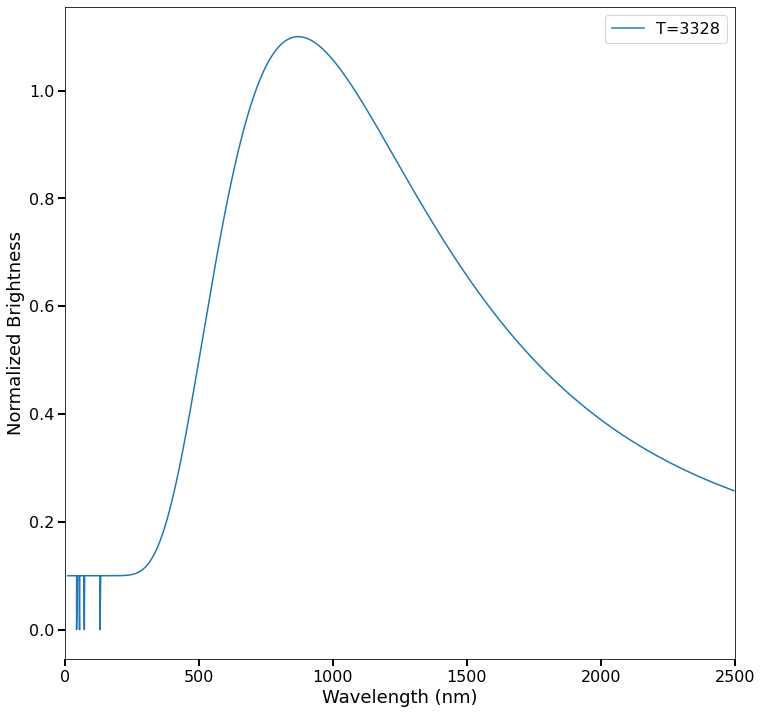

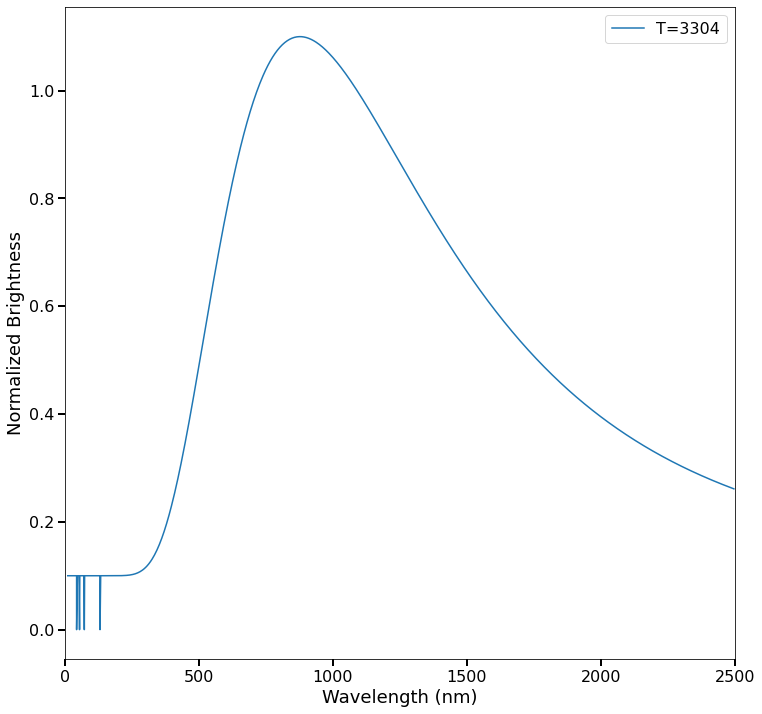

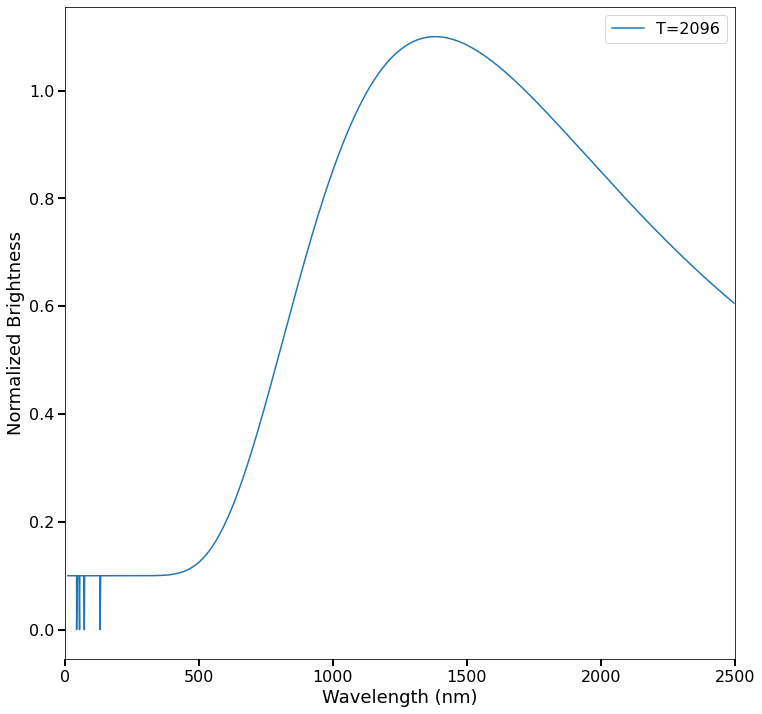

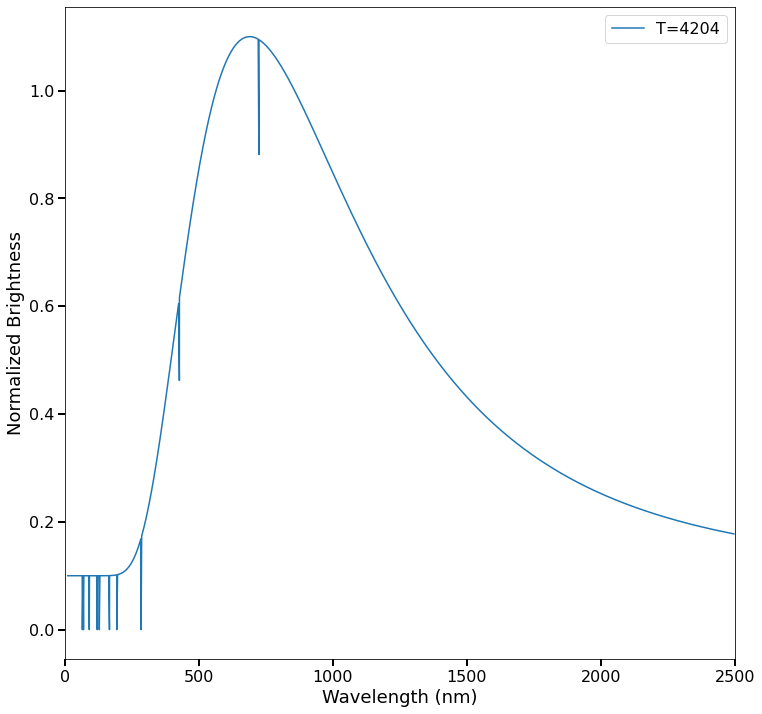

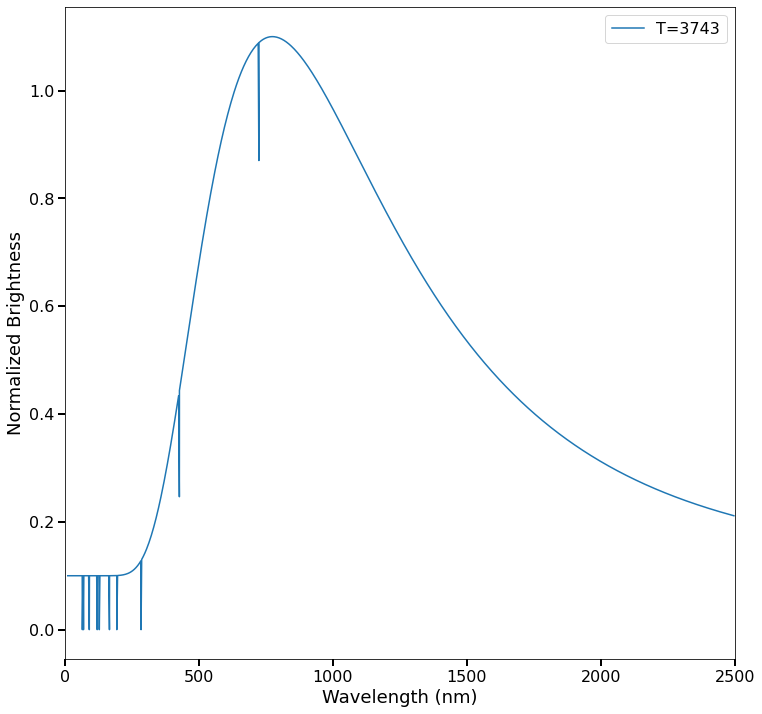

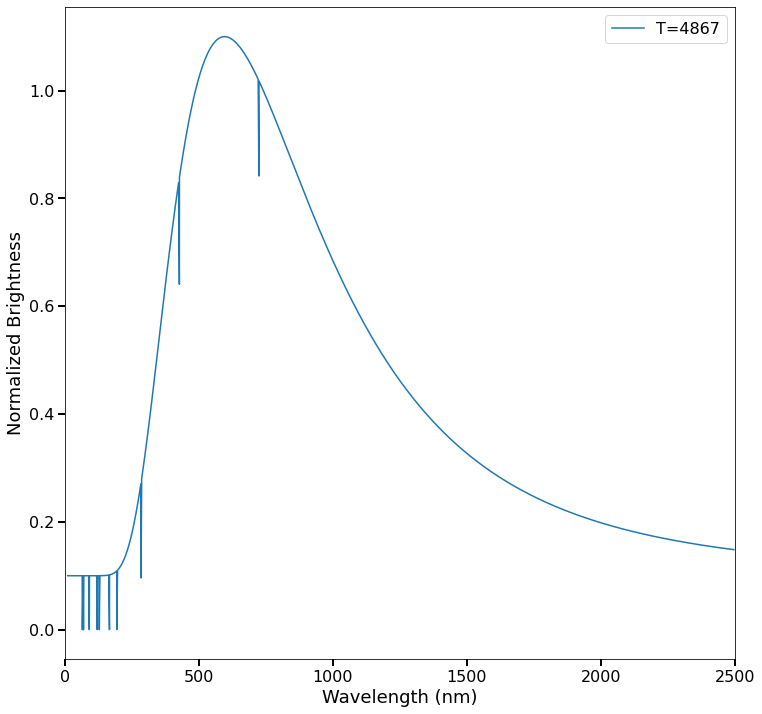

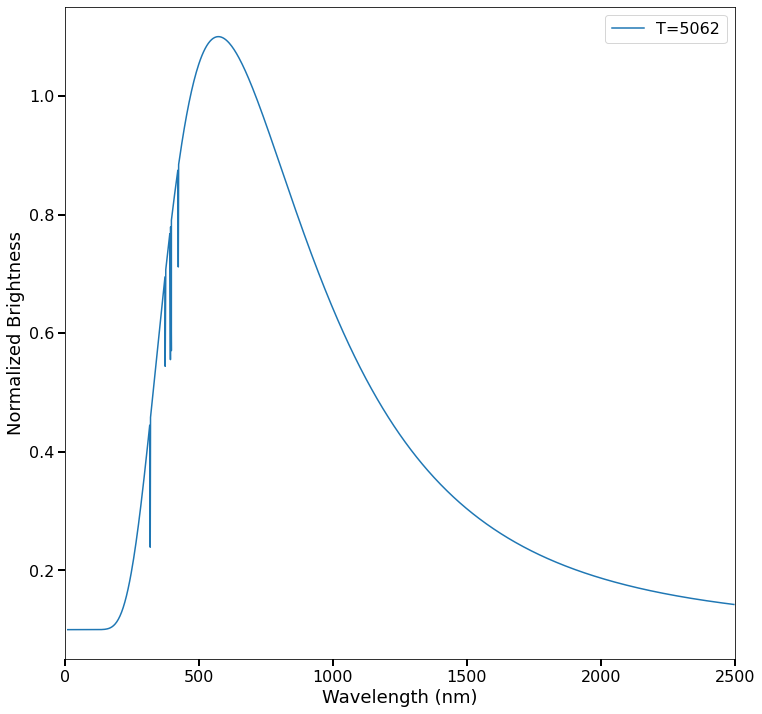

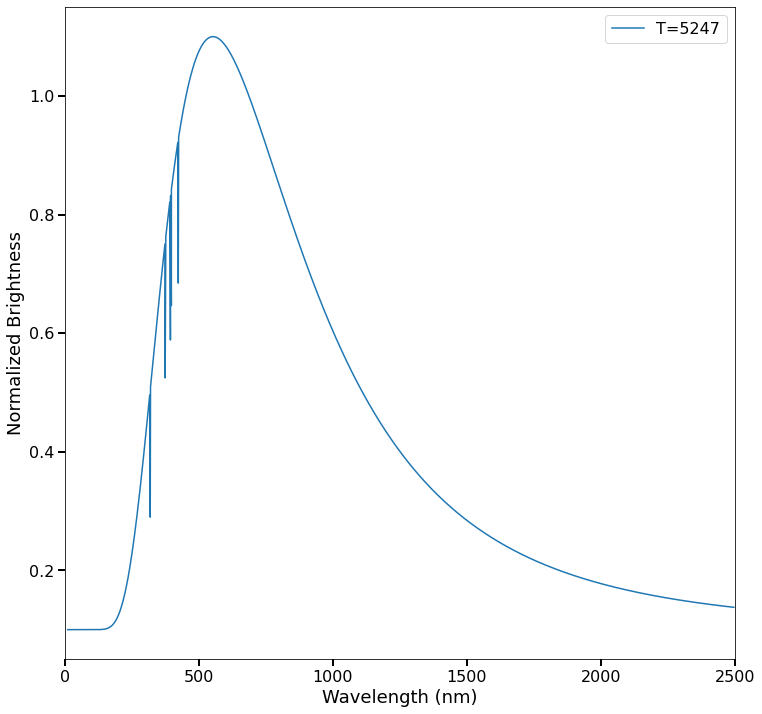

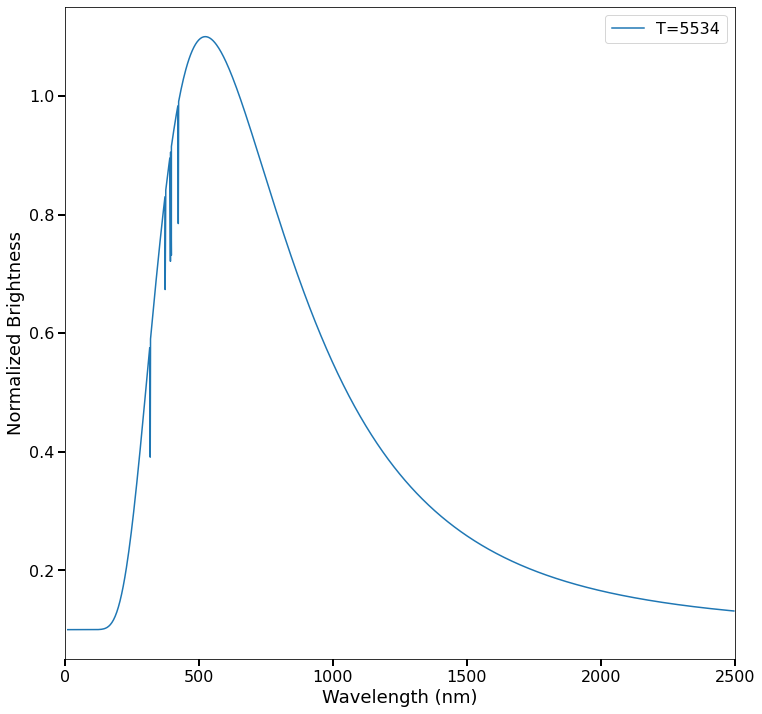

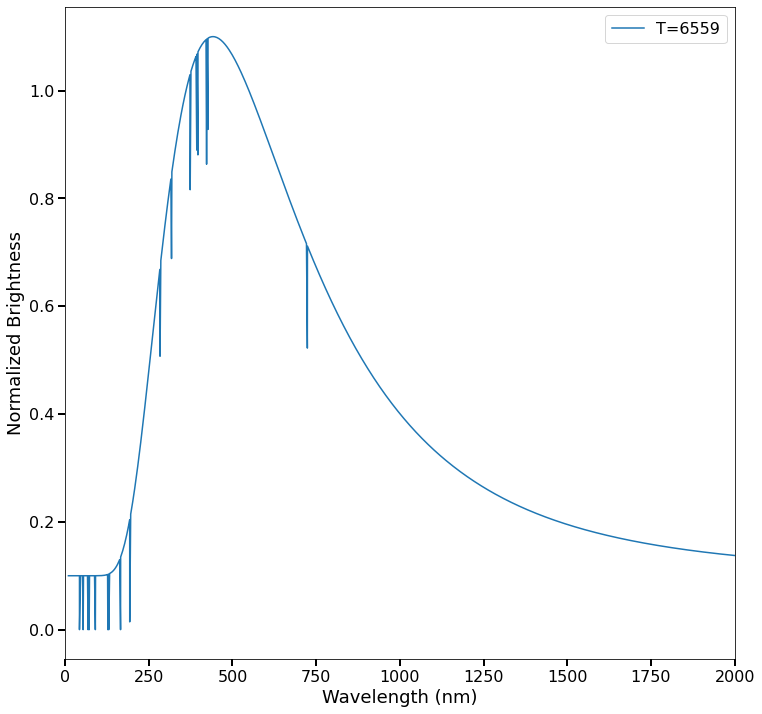

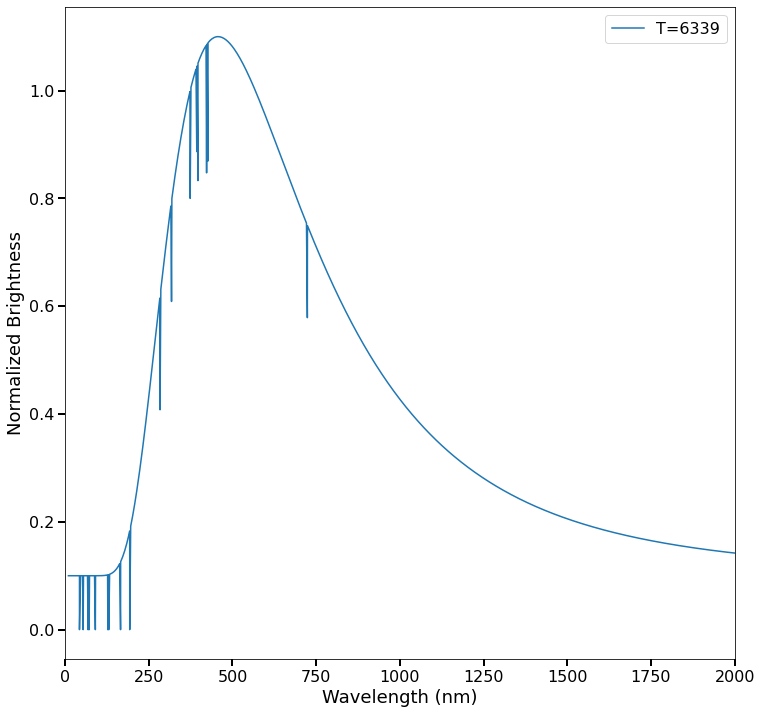

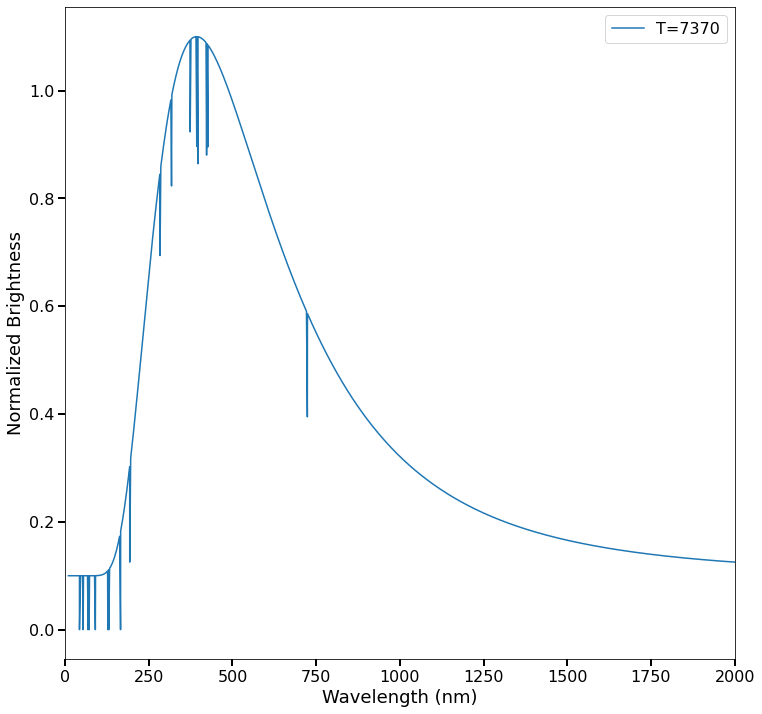

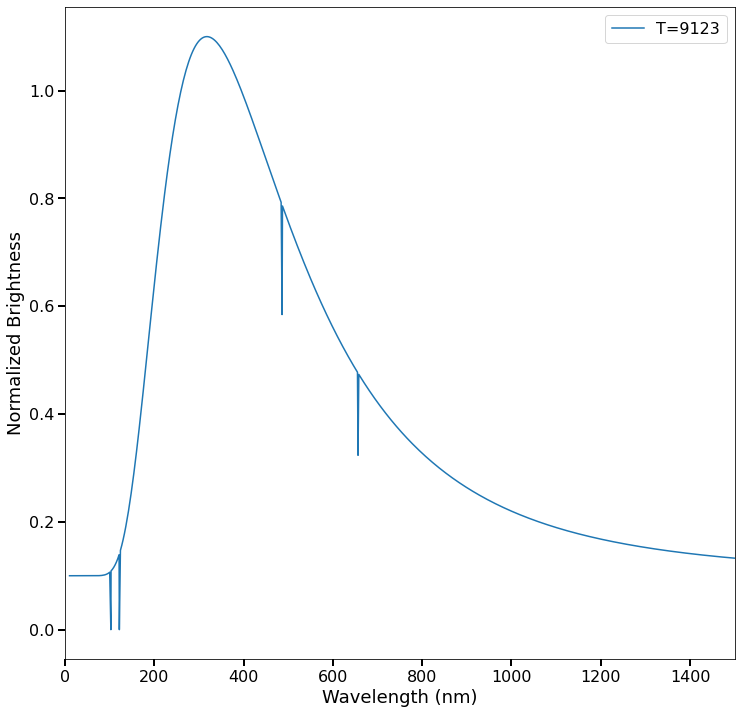

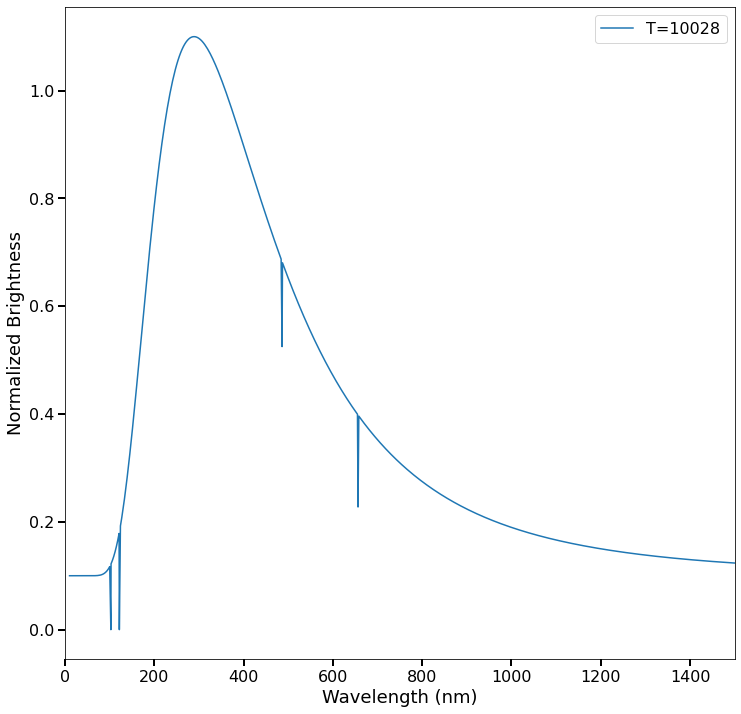

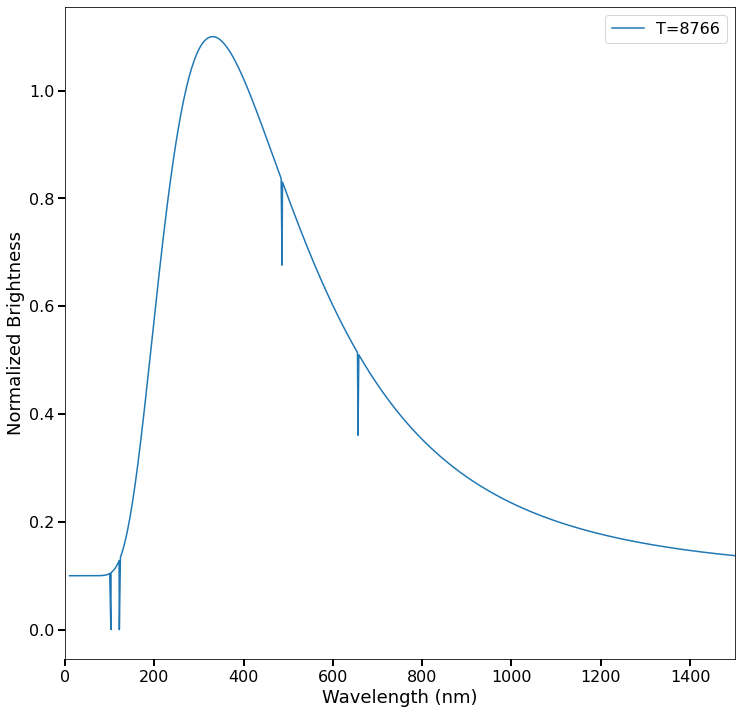

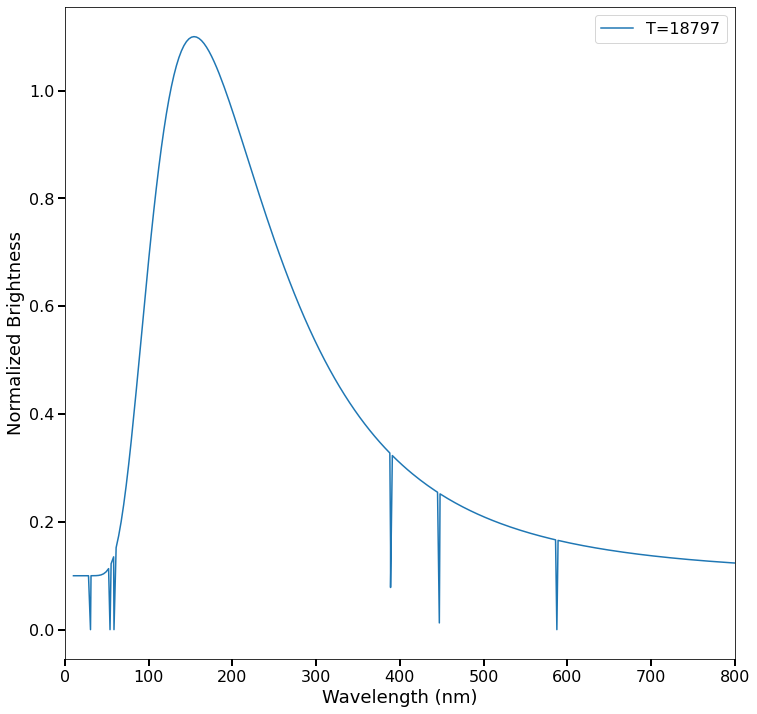

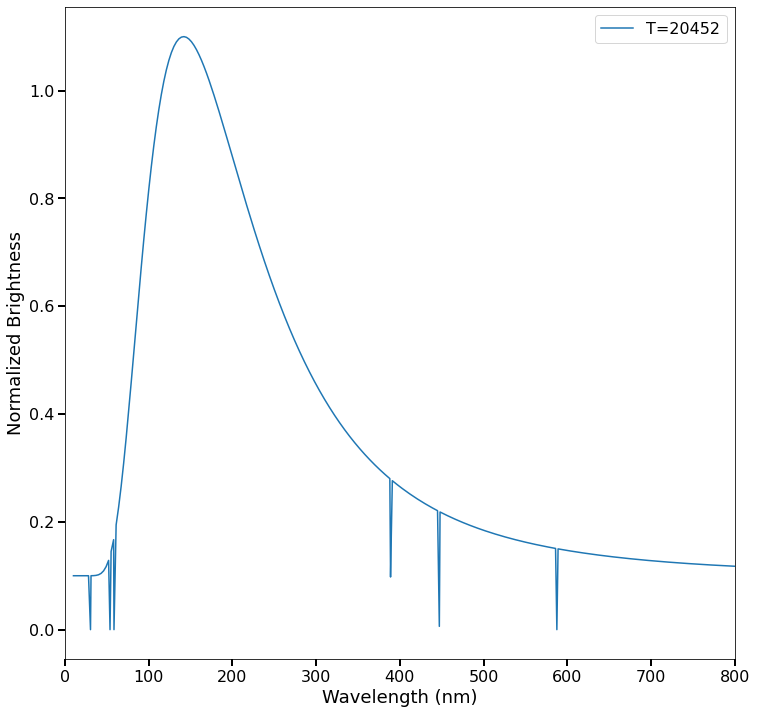

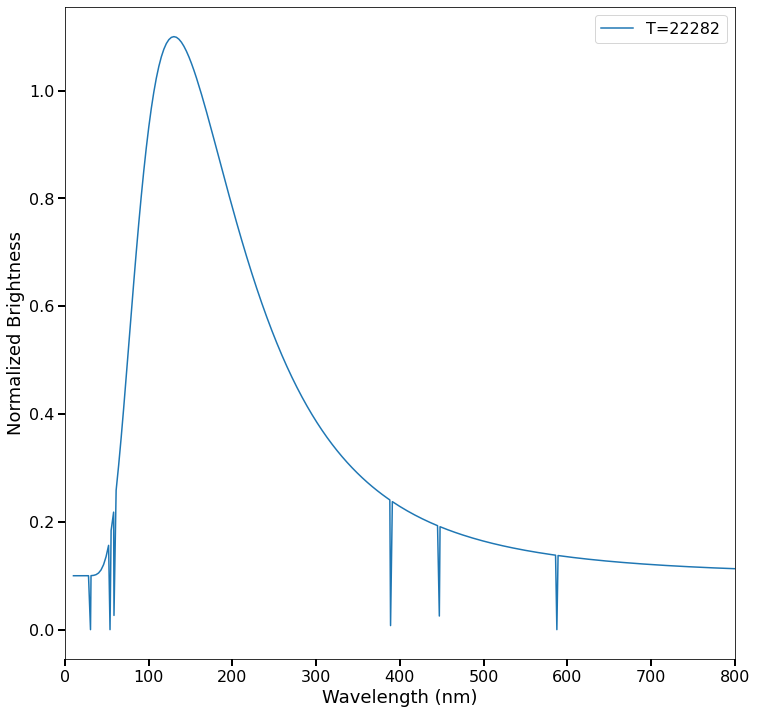

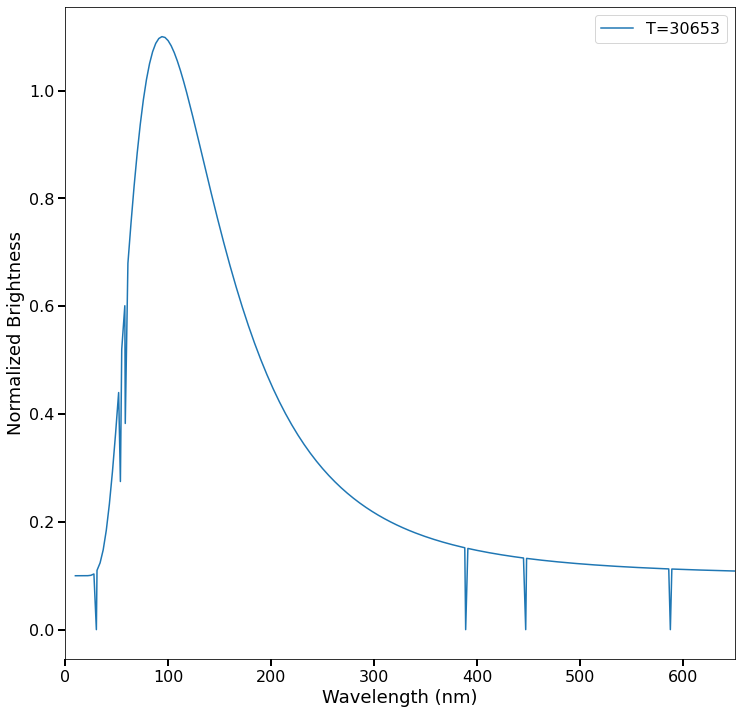

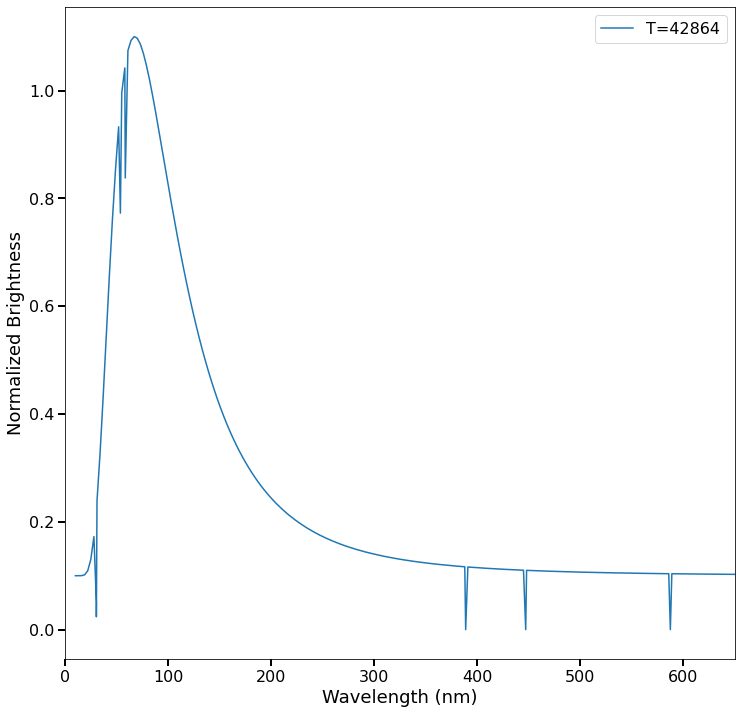

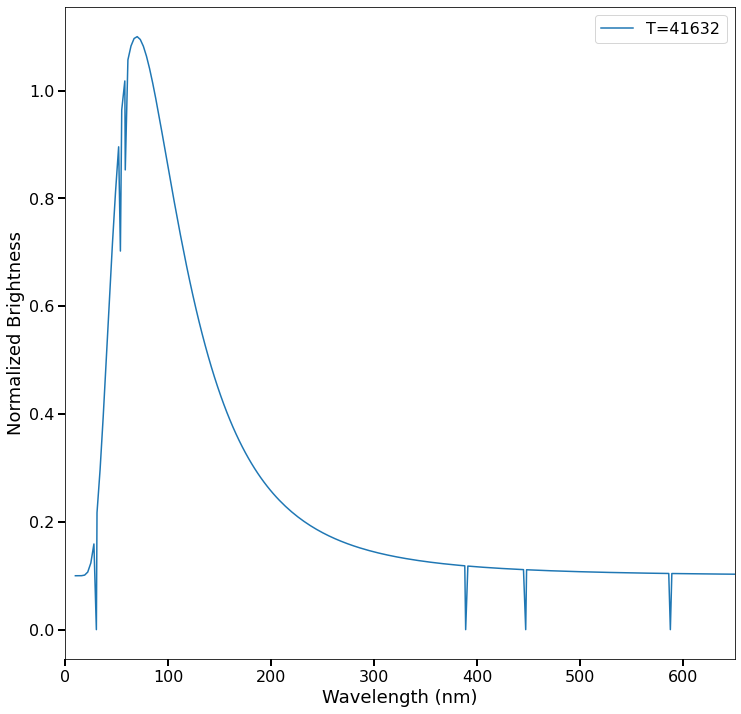

In [4]:

for i in range(7):
    rand_temps=np.random.uniform(categories[i][0],categories[i][1],3)
    for j in range(3):
        temp=rand_temps[j]
        bb_wave,flux=fluxFromBB(temp,1,wave,absorptions=ab_cats[i])

        #flux = np.atleast_1d(np.random.normal(flux, .1))
        #plt.plot(bb_wave,flux,label='T='+str(temp))
        ax=pierel.plot('plot',bb_wave,flux,label='T='+str(int(temp)),x_lab='Wavelength (nm)',y_lab='Normalized Brightness')
        ax.legend(fontsize=16)
        ax.set_xlim(cat_lims[i])
        plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_qs.pdf',format='pdf',overwrite=True)

#plt.xlabel('Wavelength (Color)',fontsize=16)
#plt.ylabel('Normalized Brightness',fontsize=16)

plt.show()

In [5]:
#rand_temps=np.random.uniform(np.min(np.min(categories)),np.max(np.max(categories)),7)

for j in range(12):
    #if j!=4:
    #    continue
    i=np.random.randint(0,7)
    temp=np.random.uniform(categories[i][0],categories[i][1])
    bb_wave,flux=fluxFromBB(temp,1,wave,absorptions=ab_cats[i])
    flux = np.atleast_1d([np.random.normal(flux[k], .03*flux[k]) if bb_wave[k] not in ab_cats[i] else flux[k] for k in range(len(flux))])
    
    #plt.plot(bb_wave,flux,label='T='+str(temp))
    ax=pierel.plot('plot',bb_wave,flux,label='Star '+str(j+1),x_lab='Wavelength (nm)',y_lab='Normalized Brightness')
    
    #ax.plot(bb_wave,flux)
    ax.legend(fontsize=16)
    ax.set_xlim(cat_lims[i])
    plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_final.pdf',format='pdf',overwrite=True)
    #plt.show()
    plt.close()
#plt.xlabel('Wavelength (Color)',fontsize=16)
#plt.ylabel('Normalized Brightness',fontsize=16)

#plt.show()

<ipython-input-5-9f6f3238cdab>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_final.pdf',format='pdf',overwrite=True)
<ipython-input-5-9f6f3238cdab>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_final.pdf',format='pdf',overwrite=True)
<ipython-input-5-9f6f3238cdab>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('blackbody_'+cat_names[i]+'_'+str(int(temp))+'_final.pdf',format='pdf',overwrite=True)
<ipython-input-5-9f6f3238cdab>:17: MatplotlibDeprecationWarning: savefig(

In [9]:
import sys
import os
import traceback
import optparse
import time
import logging

plt.close()
def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    #R *= 255
    #G *= 255
    #B *= 255
    return (R,G,B)


def color_spec(absorptions=[]):

#    import ppm_dump
#    import png_canvas
    #import canvas
    ax=None
    for wl in range(10, 751):
        if wl<380:
            r,g,b=wavelength_to_rgb(380)
        elif wl>750:
            r,g,b=wavelength_to_rgb(750)
        else:
            r, g, b = wavelength_to_rgb(wl)
        #plt.plot([wl,wl],[0,1],color=(r,g,b))
        if ax is None:
            ax=pierel.plot('plot',[wl,wl],[0,1],figsize=(12,6),color=(r,g,b),x_lab='Wavelength (nm)',y_lab='')
        else:
            ax.plot([wl,wl],[0,1],color=(r,g,b))
        #for yy in range(0, 278):
        #    canvas.pixel(wl - 380, yy, r, g, b)
    for ab in absorptions:
        ax.plot([ab,ab],[0,1],'k')
    ticks=[]
    for tick in ax.yaxis.get_major_ticks():
        ticks.append('')
    ax.set_yticklabels(ticks)
    return ax
    
all_abs=[helium,hydrogen,carbon,oxygen,nitrogen,calcium]
labs=['Helium','Hydrogen','Carbon','Oxygen','Nitrogen','Calcium']
for i in range(len(all_abs)):
    ax=color_spec(all_abs[i])
    ax.set_title(labs[i],fontsize=18)
    #plt.savefig('color_'+cat_names[i]+'_qs.pdf',format='pdf',overwrite=True)
    plt.savefig('color_ans_'+labs[i]+'.pdf',format='pdf',overwrite=True)
    plt.close()
    

for i in range(len(cat_names)):
    ax=color_spec(ab_cats[i])
    #ax.set_title(cat_names[i],fontsize=18)
    plt.savefig('color_'+cat_names[i]+'_qs.pdf',format='pdf',overwrite=True)
    #plt.savefig('color_ans_'+labs[i]+'.pdf',format='pdf',overwrite=True)
    plt.close()

<ipython-input-9-6ee0546d51c3>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks)
<ipython-input-9-6ee0546d51c3>:91: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('color_ans_'+labs[i]+'.pdf',format='pdf',overwrite=True)
<ipython-input-9-6ee0546d51c3>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks)
<ipython-input-9-6ee0546d51c3>:91: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('color_ans_'+labs[i]+'.pdf',format='pdf',overwrite=True)
<ipython-input-9-6ee0546d51c3>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks)
<ipython-input-9-6ee0546d51c

Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt

